In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import sys
sys.path.append('../')

In [4]:
import matplotlib.pyplot as plt

from src.load_data import load_oil_price_data

In [5]:
start_date = "2023-03-20"  # Задайте дату начала в формате "гггг-мм-дд"
oil_data = load_oil_price_data(start_date)

In [6]:
oil_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2023-03-20 00:00:00-04:00,58.730000,59.869999,58.049999,59.790001,5391600,0.0,0.0,0.0
2023-03-21 00:00:00-04:00,60.540001,61.320000,60.110001,61.230000,3975100,0.0,0.0,0.0
2023-03-22 00:00:00-04:00,61.389999,62.669998,60.919998,61.610001,3512800,0.0,0.0,0.0
2023-03-23 00:00:00-04:00,62.509998,63.020000,60.900002,60.990002,2635500,0.0,0.0,0.0
2023-03-24 00:00:00-04:00,60.310001,61.250000,59.840000,60.959999,3721100,0.0,0.0,0.0


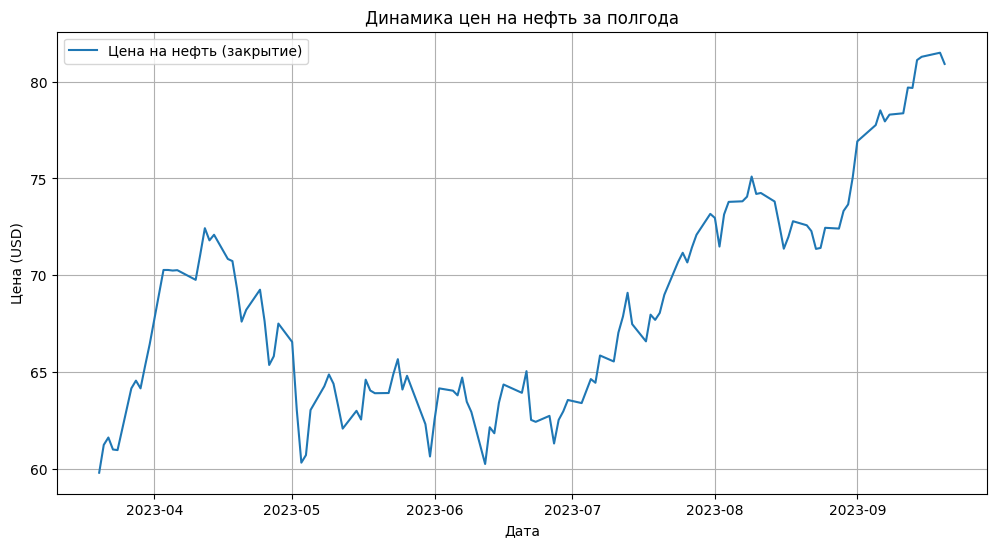

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(oil_data.index, oil_data['Close'], label='Цена на нефть (закрытие)')
plt.title('Динамика цен на нефть за полгода')
plt.xlabel('Дата')
plt.ylabel('Цена (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
statistics = oil_data.describe()
statistics

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
count,128.000000,128.000000,128.000000,128.000000,1.280000e+02,128.0,128.0,128.0
mean,68.279922,68.920000,67.618984,68.344688,3.381727e+06,0.0,0.0,0.0
std,5.545369,5.471996,5.615820,5.573522,1.617495e+06,0.0,0.0,0.0
min,58.730000,59.869999,58.049999,59.790001,1.220800e+06,0.0,0.0,0.0
25%,63.757499,64.390001,63.089999,63.907500,2.401900e+06,0.0,0.0,0.0
50%,67.400002,68.045002,66.889999,67.549999,2.989350e+06,0.0,0.0,0.0
75%,72.417501,72.832500,71.662500,72.312500,3.801425e+06,0.0,0.0,0.0
max,82.180000,82.279999,81.120003,81.500000,1.216670e+07,0.0,0.0,0.0


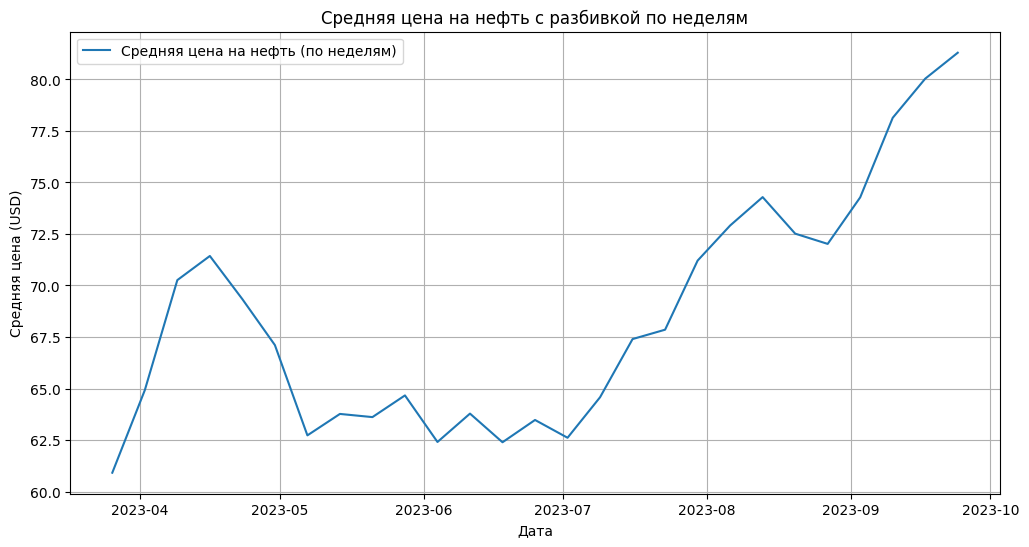

In [9]:
weekly_mean = oil_data['Close'].resample('W').mean()
plt.figure(figsize=(12, 6))
plt.plot(weekly_mean.index, weekly_mean.values, label='Средняя цена на нефть (по неделям)')
plt.title('Средняя цена на нефть с разбивкой по неделям')
plt.xlabel('Дата')
plt.ylabel('Средняя цена (USD)')
plt.legend()
plt.grid(True)
plt.show()


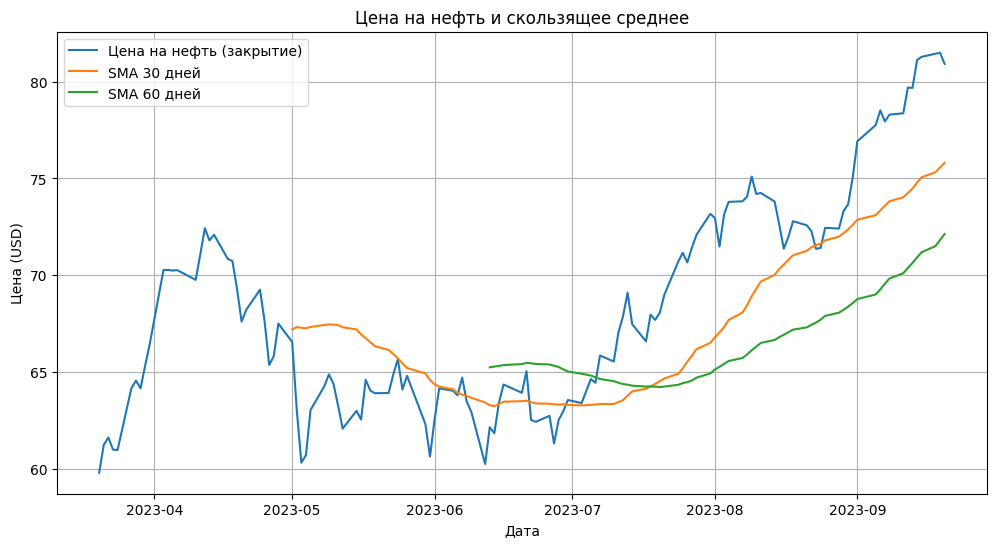

In [10]:
# Скользящее среднее с периодами 30 и 60 дней
oil_data['SMA30'] = oil_data['Close'].rolling(window=30).mean()
oil_data['SMA60'] = oil_data['Close'].rolling(window=60).mean()
plt.figure(figsize=(12, 6))
plt.plot(oil_data.index, oil_data['Close'], label='Цена на нефть (закрытие)')
plt.plot(oil_data.index, oil_data['SMA30'], label='SMA 30 дней')
plt.plot(oil_data.index, oil_data['SMA60'], label='SMA 60 дней')
plt.title('Цена на нефть и скользящее среднее')
plt.xlabel('Дата')
plt.ylabel('Цена (USD)')
plt.legend()
plt.grid(True)
plt.show()

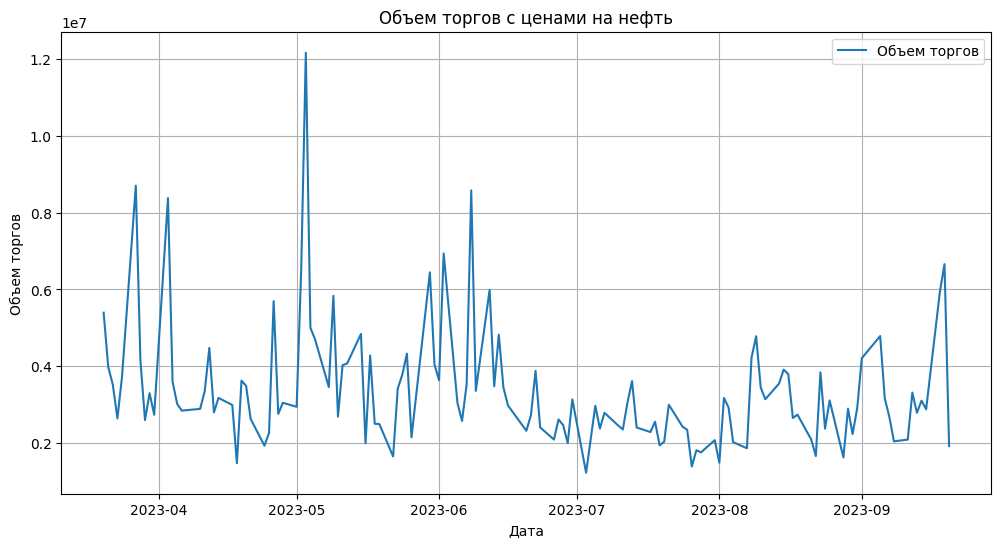

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(oil_data.index, oil_data['Volume'], label='Объем торгов')
plt.title('Объем торгов с ценами на нефть')
plt.xlabel('Дата')
plt.ylabel('Объем торгов')
plt.legend()
plt.grid(True)
plt.show()


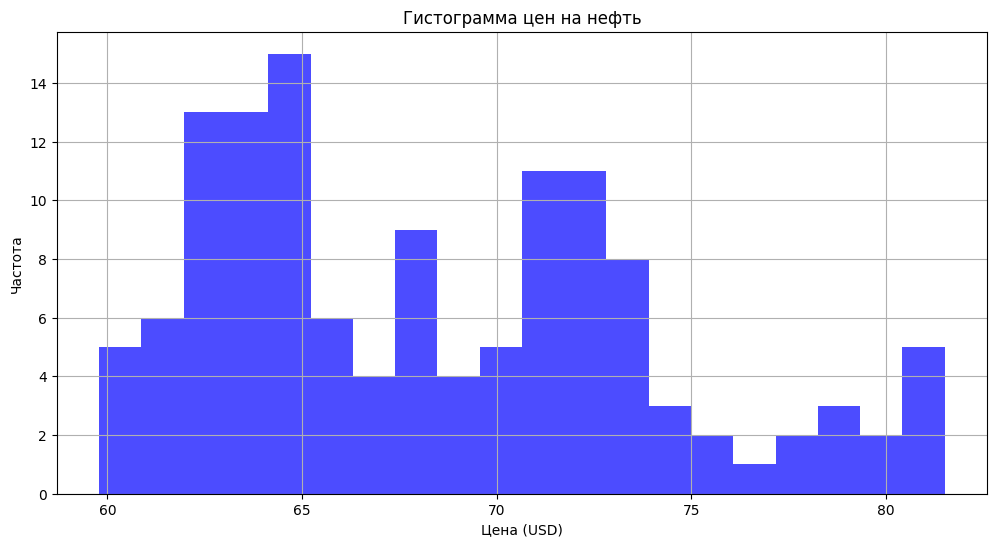

In [12]:
plt.figure(figsize=(12, 6))
plt.hist(oil_data['Close'], bins=20, alpha=0.7, color='b')
plt.title('Гистограмма цен на нефть')
plt.xlabel('Цена (USD)')
plt.ylabel('Частота')
plt.grid(True)
plt.show()


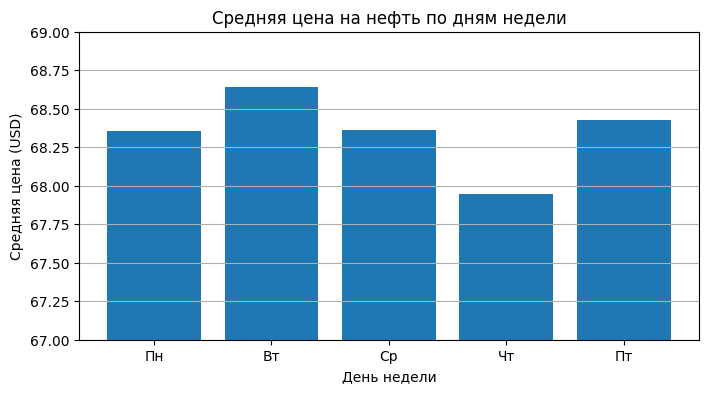

In [17]:
# Группировка данных по дням недели
oil_data['DayOfWeek'] = oil_data.index.dayofweek
day_of_week_mean = oil_data.groupby('DayOfWeek')['Close'].mean()
days = ['Пн', 'Вт', 'Ср', 'Чт', 'Пт']
plt.figure(figsize=(8, 4))
plt.bar(days, day_of_week_mean)
plt.title('Средняя цена на нефть по дням недели')
plt.xlabel('День недели')
plt.ylabel('Средняя цена (USD)')
plt.grid(axis='y')
plt.ylim(bottom=67, top=69)
plt.show()


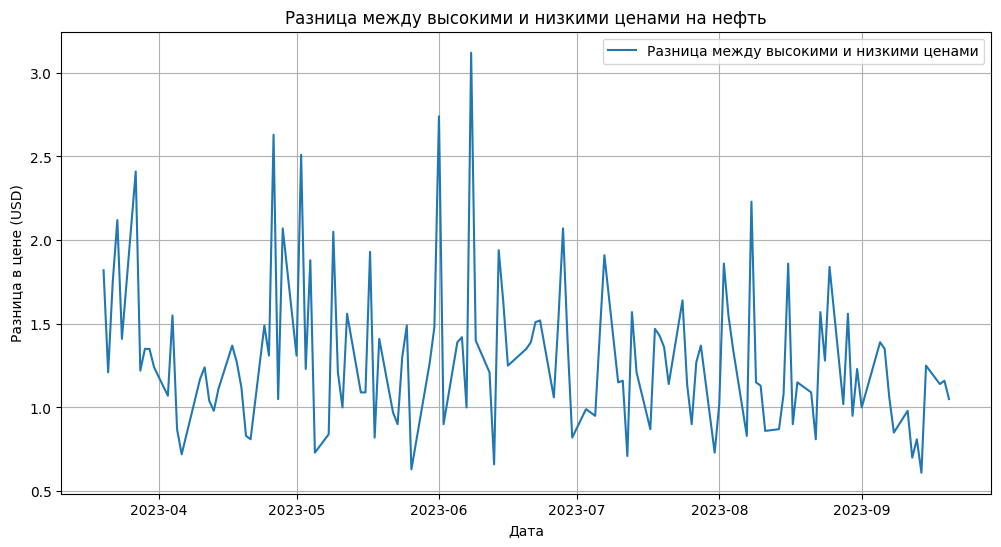

In [18]:
oil_data['High-Low'] = oil_data['High'] - oil_data['Low']

plt.figure(figsize=(12, 6))
plt.plot(oil_data.index, oil_data['High-Low'], label='Разница между высокими и низкими ценами')
plt.title('Разница между высокими и низкими ценами на нефть')
plt.xlabel('Дата')
plt.ylabel('Разница в цене (USD)')
plt.legend()
plt.grid(True)
plt.show()